In [1]:
import math
import matplotlib.pyplot as plt
import random

In [2]:
def AIMD(a:int=1, b:float=0.5, cwnd:int=10, data_packet:tuple=(None, "Dropped"), RTT_tracker:list=[])->list:
    """This function mimics the Additive Increase and Multiplicative Decrease Mechanism in TCP Congestion Control.

    Parameters
    ----------
    a: int-type
    This constant controls the rate of Additive Increase. This optimises the efficiency of the network.
    
    b: float-type
    This constant controls the rate of Multiplicative Decrease. This optimises the fairness of the network.
    This value is between 0 (exclusive) and alpha (exclusive).
    
    With these two parameters, the network system converges to optimal network conditions where the fairness line intersects with the 
    efficiency line.
    
    cwnd: int-type
    This denotes the current window size.
    
    data_packet: tuple-type
    This represents the data packet to be transferred through the network.
    
    RTT_tracker: list-type
    This tracks the RTT to cwnd size.
    
    Returns
    -------
    cwnd load
    """
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = math.floor(cwnd * b)
        
    RTT_tracker.append(cwnd)
    
    return cwnd

def generate_data_packets(num_packets, drop_probability):
    """
    Generate a list of tuples representing data packets with randomly dropped packets.

    Parameters:
    - num_packets: The total number of data packets.
    - drop_probability: The probability of a packet being dropped (a float between 0 and 1).

    Returns:
    - A list of tuples representing data packets.
    """
    data_packets = [(x, "Transfer") if random.random() > drop_probability else (x, "Dropped") for x in range(1, num_packets + 1)]
    return data_packets

def generate_data_packets_consistent_drops(num_packets):
    return [(x, "Transfer") if x % 5 != 0 else (x, "Dropped") for x in range(1, num_packets+1)]

def simulate_tcp_congestion(ai, md, initial_cwnd, num__packets, drop_probability):
    # Set Up for Data
    data_packets = generate_data_packets(100,0.2)
    # Parameters
    cwnd = 10
    a = 1
    b = 0.5

    # Iterate
    RTT_tracker = []
    for data_packet in data_packets:
        cwnd = AIMD(a, b, cwnd, data_packet, RTT_tracker)

    # Visualise
    x, y = [], []
    for idx, cwnd in enumerate(RTT_tracker):
        print(f"RTT {idx + 1}:\t", cwnd)
        x.append(idx + 1)
        y.append(cwnd)

    # fig, ax = plt.subplots()
    # ax.plot(x, y)
    # ax.set_xlabel("RTT")
    # ax.set_ylabel("CWND")
    # ax.set_title(f"RTT vs CWND with a={a} and b={b}")

    # return fig, ax
    return x,y

RTT 1:	 11
RTT 2:	 12
RTT 3:	 13
RTT 4:	 6
RTT 5:	 7
RTT 6:	 8
RTT 7:	 4
RTT 8:	 5
RTT 9:	 6
RTT 10:	 7
RTT 11:	 8
RTT 12:	 9
RTT 13:	 10
RTT 14:	 11
RTT 15:	 12
RTT 16:	 13
RTT 17:	 14
RTT 18:	 7
RTT 19:	 8
RTT 20:	 9
RTT 21:	 10
RTT 22:	 11
RTT 23:	 12
RTT 24:	 13
RTT 25:	 14
RTT 26:	 7
RTT 27:	 3
RTT 28:	 4
RTT 29:	 2
RTT 30:	 3
RTT 31:	 4
RTT 32:	 5
RTT 33:	 6
RTT 34:	 7
RTT 35:	 8
RTT 36:	 9
RTT 37:	 10
RTT 38:	 11
RTT 39:	 5
RTT 40:	 6
RTT 41:	 3
RTT 42:	 4
RTT 43:	 5
RTT 44:	 6
RTT 45:	 7
RTT 46:	 8
RTT 47:	 9
RTT 48:	 10
RTT 49:	 11
RTT 50:	 12
RTT 51:	 13
RTT 52:	 14
RTT 53:	 15
RTT 54:	 7
RTT 55:	 8
RTT 56:	 9
RTT 57:	 10
RTT 58:	 11
RTT 59:	 12
RTT 60:	 13
RTT 61:	 6
RTT 62:	 7
RTT 63:	 8
RTT 64:	 9
RTT 65:	 10
RTT 66:	 11
RTT 67:	 5
RTT 68:	 6
RTT 69:	 7
RTT 70:	 3
RTT 71:	 4
RTT 72:	 5
RTT 73:	 6
RTT 74:	 3
RTT 75:	 4
RTT 76:	 5
RTT 77:	 6
RTT 78:	 7
RTT 79:	 8
RTT 80:	 9
RTT 81:	 10
RTT 82:	 11
RTT 83:	 5
RTT 84:	 6
RTT 85:	 7
RTT 86:	 8
RTT 87:	 9
RTT 88:	 10
RTT 89:	 11

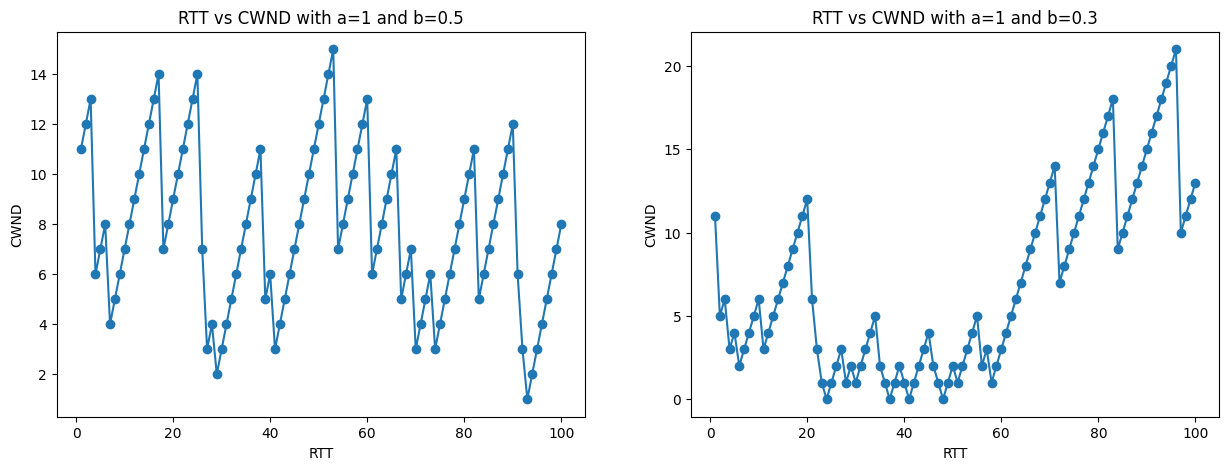

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

x1, y1 = simulate_tcp_congestion(ai=1, md=0.5, initial_cwnd=10, num__packets=50, drop_probability=0.2)
x2, y2 = simulate_tcp_congestion(ai=1, md=0.3, initial_cwnd=10, num__packets=50, drop_probability=0.2)

# Assign each subplot to a specific position
axs[0].plot(x1,y1,marker='o')
axs[0].set_xlabel("RTT")
axs[0].set_ylabel("CWND")
axs[0].set_title(f"RTT vs CWND with a={1} and b={0.5}")

axs[1].plot(x2,y2,marker='o')
axs[1].set_xlabel("RTT")
axs[1].set_ylabel("CWND")
axs[1].set_title(f"RTT vs CWND with a={1} and b={0.3}")

plt.show()

In [4]:
# import numpy as np

# ITERATESMAX = 100  # You can adjust this value as needed
# C = 10  # Adjust C value as needed
# alpha = 1  # Adjust alpha value as needed
# exponent1 = 2  # Adjust exponent1 value as needed
# exponent2 = 0.5  # Adjust exponent2 value as needed
# x1 = 1
# x2 = 1
# alpha1 = 0
# alpha2 = 0
# x1_values = np.zeros(ITERATESMAX)
# x2_values = np.zeros(ITERATESMAX)

# for i in range(ITERATESMAX):
#     # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
#     if (x1 + x2 <= C):
#         # Additive increase phase
#         # print('Additive I')
#         alpha1 = alpha * np.power(x1, exponent1)
#         alpha2 = alpha * np.log(x2 + 1)
#         x1 = x1 + alpha1
#         x2 = x2 + alpha2
#     else:
#         # Simulate network condition (for example, congestion)
#         # print('Multiplicative D')
#         beta1 = exponent1
#         beta2 = exponent2
#         x1 = x1 * beta1
#         x2 = x2 * beta2

#     # Store values in arrays
#     x1_values[i] = x1
#     x2_values[i] = x2

# # Display the final values
# print("Final x1:", x1)
# print("Final x2:", x2)

# print("Final x1:", x1_values)
# print("Final x2:", x2_values)

# # Plot the graph
# # plt.plot(range(ITERATESMAX), x1_values, label='Flow 1')
# # plt.plot(range(ITERATESMAX), x2_values, label='Flow 2')
# # plt.xlabel('Iterations')
# # plt.ylabel('Flow Values')
# # plt.legend()

# plt.scatter(x1_values, x2_values, label='AIMD', marker='o')
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.show()

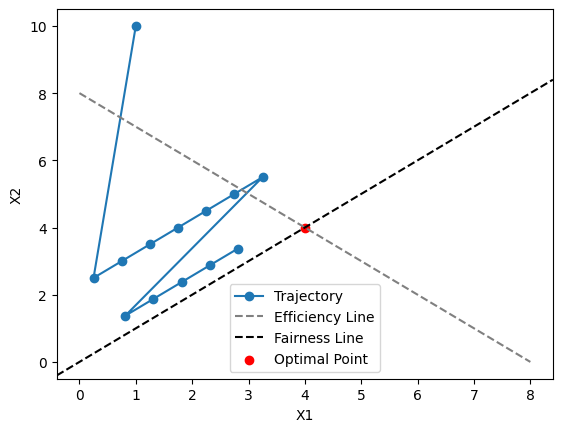

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def tcp_congestion_control(X1_initial, X2_initial, X_goal, a, b, num_steps):
    # Initialize arrays to store trajectory points
    X1_values = [X1_initial]
    X2_values = [X2_initial]

    for _ in range(num_steps):
        # Calculate fairness at the current point
        fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))

        # Check whether the system is underloaded, overloaded, or efficient
        if X1_values[-1] + X2_values[-1] < X_goal:
            # Underloaded: Apply additive increase
            X1_values.append(X1_values[-1] + a)
            X2_values.append(X2_values[-1] + a)
        elif X1_values[-1] + X2_values[-1] > X_goal:
            # Overloaded: Apply multiplicative decrease
            X1_values.append(X1_values[-1] / b)
            X2_values.append(X2_values[-1] / b)
        else:
            # Efficient: Stay at the optimal point
            X1_values.append(X_goal / 2)
            X2_values.append(X_goal / 2)

    # Plot the trajectory
    plt.plot(X1_values, X2_values, marker='o', label='Trajectory')
    plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
    plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

    # Mark the optimal point
    plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

    # Add labels and legend
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

    # Show the plot
    plt.show()

    return X1_values, X2_values


# Run the simulation
X1_values, X2_values = tcp_congestion_control(X1_initial=1, X2_initial=10, X_goal=8, a=0.5, b=4, num_steps=12)

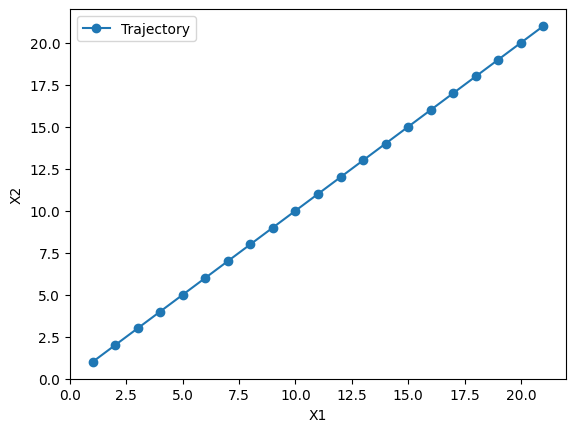

In [6]:
# Set Up for Data
data_packets = generate_data_packets(20, 0.2)

# Parameters
cwnd = 1
a = 1
b = 0.5

# Initialize arrays to store trajectory points
X1_values = [cwnd]
X2_values = [cwnd]

# Iterate through data packets
for data_packet in data_packets:
    cwnd = AIMD(a, b, cwnd, data_packet)

    # Check packet status and adjust congestion control accordingly
    _, status = data_packet
    if status == "Dropped":
        cwnd = max(1, math.floor(cwnd * b))  # Example: Multiplicative decrease for dropped packets

    # Update trajectory
    X1_values.append(X1_values[-1] + a)
    X2_values.append(X2_values[-1] + a)

# Visualize
plt.plot(X1_values, X2_values, marker='o', label='Trajectory')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

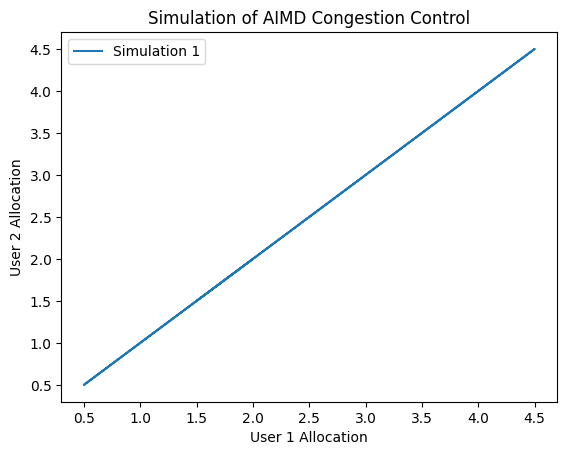

In [19]:
import matplotlib.pyplot as plt

def AIMD(a, b, cwnd, data_packet, RTT_tracker, user_allocations):
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = math.floor(cwnd * b)
        
    RTT_tracker.append(cwnd)
    
    # Track user allocations
    user1_allocation = cwnd / 2
    user2_allocation = cwnd / 2
    user_allocations[0].append(user1_allocation)
    user_allocations[1].append(user2_allocation)
    
    return cwnd

def simulate_tcp_congestion(a, b, initial_cwnd_user1, initial_cwnd_user2, num_packets, drop_probability):
    # Set Up for Data
    data_packets = generate_data_packets(num_packets, drop_probability)
    # Parameters
    cwnd_user1 = initial_cwnd_user1
    cwnd_user2 = initial_cwnd_user2

    # Track user allocations
    user_allocations = [[], []]

    # Iterate
    RTT_tracker = []
    for data_packet in data_packets:
        cwnd_user1 = AIMD(a, b, cwnd_user1, data_packet, RTT_tracker, user_allocations)
        cwnd_user2 = AIMD(a, b, cwnd_user2, data_packet, RTT_tracker, user_allocations)

    # Visualize
    x, y = [], []
    for idx, cwnd in enumerate(RTT_tracker):
        x.append(idx + 1)
        y.append(cwnd)

    return x, y, user_allocations

def evaluate_convergence(num_simulations, num_packets, drop_probability, initial_cwnd_user1, initial_cwnd_user2):
    convergence_data = []

    for _ in range(num_simulations):
        x_data, y_data, user_allocations = simulate_tcp_congestion(1, 0.5, initial_cwnd_user1, initial_cwnd_user2, num_packets, drop_probability)
        convergence_data.append((x_data, y_data, user_allocations))

    # Visualize convergence for each simulation
    for idx, (x_data, y_data, user_allocations) in enumerate(convergence_data):
        plt.plot(user_allocations[0], user_allocations[1], label=f'Simulation {idx + 1}')

    # Add labels and legend
    plt.xlabel('User 1 Allocation')
    plt.ylabel('User 2 Allocation')
    plt.title(f'Simulation of AIMD Congestion Control')
    plt.legend()
    plt.show()

# Example usage with different initial values for user allocations
evaluate_convergence(num_simulations=1, num_packets=10, drop_probability=0.2, initial_cwnd_user1=2, initial_cwnd_user2=3)
